In [1]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore
import collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from deep_translator import GoogleTranslator
from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Initialize Firebase Admin SDK and Firestore
cred = credentials.Certificate('./.streamlit/key.json')
firebase_admin.initialize_app(cred)
db = firestore.client()

In [4]:
# Get all documents in the "users" collection
queries = db.collection('queries')
docs = queries.stream()

# Initialize variables for analysis
total_queries = 0
query = []
number = []
time = []
language = []
# Analyze each document in the collection
for doc in docs:
    data = doc.to_dict()
    total_queries += 1
    query.append(data["query"])
    number.append(data["number"])
    time.append(data["timestamp"])
    try:    
        language.append(data["language"])
    except:
        language.append("English")
    # Check if user is active or inactive

    # Print analysis results
print('Total Queries:', total_queries)
    

Total Queries: 93


# Queries

In [5]:
all_queries = ". ".join(query)

In [6]:
query_count = {}
for word in query:
    if word in query_count:
        query_count[word] += 1
    else:
        query_count[word] = 1


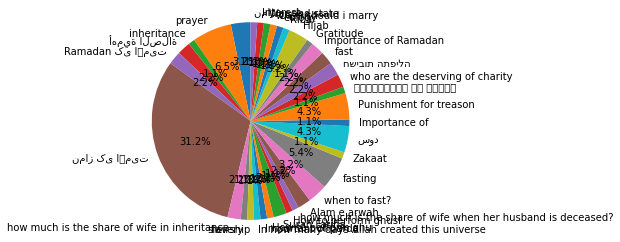

In [7]:
words = list(query_count.keys())
counts = list(query_count.values())


fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=words, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

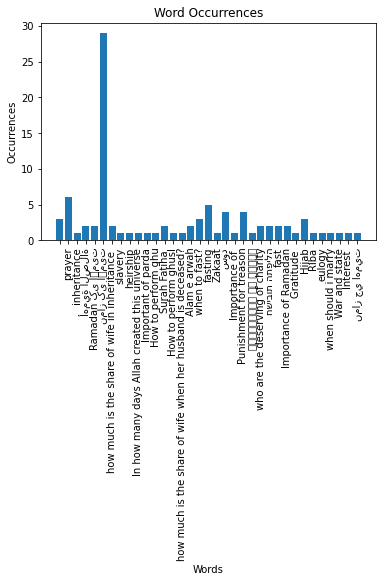

In [8]:
# Create a bar chart of the word occurrences
plt.bar(words, counts)

# Set the title and axis labels
plt.title("Word Occurrences")
plt.xlabel("Words")
plt.ylabel("Occurrences")

# Rotate the x-axis labels vertically for readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


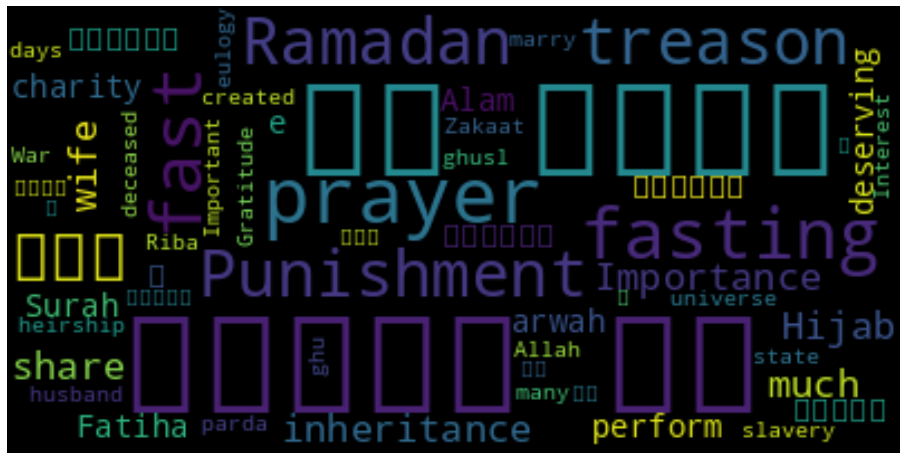

In [9]:
wordcloud = WordCloud(max_font_size=60).generate(all_queries)
plt.figure(figsize=(16,12))

# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Translated to English

In [10]:
def translate(query):
    return GoogleTranslator(target="en").translate(query)

In [ ]:
translated = []

for i in tqdm(query):
    translated.append(translate(i))


query_count = {}
for word in translated:
    if word in query_count:
        query_count[word] += 1
    else:
        query_count[word] = 1


 81%|███████████████████████▍     | 75/93 [01:52<00:27,  1.55s/it]

In [ ]:
words = list(query_count.keys())

counts = list(query_count.values())


fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=words, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

In [ ]:
# Create a bar chart of the word occurrences
plt.bar(words, counts)

# Set the title and axis labels
plt.title("Word Occurrences")
plt.xlabel("Words")
plt.ylabel("Occurrences")

# Rotate the x-axis labels vertically for readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


In [ ]:
wordcloud = WordCloud(max_font_size=60).generate(". ".join(translated))
plt.figure(figsize=(16,12))

# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Language

In [ ]:
language_count = {}
for word in language:
    if word in language_count:
        language_count[word] += 1
    else:
        language_count[word] = 1


In [ ]:
labels = list(language_count.keys())
sizes = list(language_count.values())

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

In [ ]:
# Create a bar chart of the word occurrences
plt.bar(labels, sizes)

# Set the title and axis labels
plt.title("Languages")
plt.xlabel("Language")
plt.ylabel("Occurrences")

# Rotate the x-axis labels vertically for readability
plt.xticks(rotation=90)

# Display the plot
plt.show()
